In [24]:
# installations
!pip install kaggle
!pip install keras
!pip install tensorflow
!pip install matplotlib
!pip install pandas

  Found existing installation: setuptools 39.0.1
    Uninstalling setuptools-39.0.1:
      Successfully uninstalled setuptools-39.0.1


In [25]:
# imports
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical

In [8]:
# download dataset
!kaggle competitions download -c mais202-fall2019

mais202-fall2019.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# extract the files from the zip folder into an unzipped folder
archive = zipfile.ZipFile('mais202-fall2019.zip', 'r')
archive.extractall('./mais202-fall2019/')

In [11]:
# read the npy files
train_images = np.load('./mais202-fall2019/train_images.npy')
test_images = np.load('./mais202-fall2019/test_images.npy')

In [28]:
# read the train labels
labels = pd.read_csv('./mais202-fall2019/train_labels.csv')
train_labels = to_categorical(np.array(labels.iloc[:, 1]))

# test
print(train_labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [40]:
# read the label to string mapping
labels_to_string = pd.read_csv('./mais202-fall2019/label_int_to_str_mapping.csv')
label_mapping = np.array(labels_to_string.iloc[:, 0:2])

# test
print(label_mapping[0])

[0 'T-shirt/top']


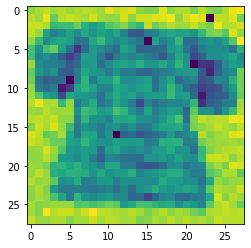

In [12]:
# function to visualize an image
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()
    
# visualize one image
show_image(train_images[0])

In [16]:
# test
print(train_images.shape, '\n\n', train_images[0])

(50000, 28, 28) 

 [[100  90  84  93  87  95  91  87  89  95  76  85  81  77  99 104 103  76
   99  90  89 106  87 101 104  90  73  69]
 [ 88  94  74 112  88  83  88  93  80  94  98  99  79 100  82  83  76  76
   72  98  82  72  78   0  84  87  76 107]
 [ 83  82  90 130 126 125 108 135 149 140 118 112 101 119 131  84 110 100
   88  94  93  84  97 105  72  89  89  79]
 [ 85  96 147 175 162 147 164 143 158 144 155 143 172 201 206 179 174 151
  141 150 147 157 130 106 103 116  78  98]
 [ 98 129 165 146 142 149 183 183 141 127 155 168 154 172 182   0 145 177
  159 130 187 190 164 157 165 148 117  67]
 [123 161 123 111 150 185 227 190 152 165 178 189 145 157 195 193 189 189
  155 146 181 204 176 162 163 164 184 137]
 [126 173 162 177 200 222 201 150 154 180 208 181 161 175 167 175 187 203
  173 142 163 215 197 164 163 157 143 167]
 [ 94 163 175 173 182 204 191 154 152 186 164 148 141 152 137 155 157 142
  161 132 159   0 227 230 198 165 149 156]
 [110 153 169 158 200 202 179 141 154 162 180

In [17]:
# normalize the images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [18]:
# reshape the images
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [43]:
# test
print(train_images.shape, '\n\n', train_images[0])

(50000, 28, 28, 1) 

 [[[-0.10784314]
  [-0.14705882]
  [-0.17058824]
  [-0.13529412]
  [-0.15882353]
  [-0.12745098]
  [-0.14313725]
  [-0.15882353]
  [-0.15098039]
  [-0.12745098]
  [-0.20196078]
  [-0.16666667]
  [-0.18235294]
  [-0.19803922]
  [-0.11176471]
  [-0.09215686]
  [-0.09607843]
  [-0.20196078]
  [-0.11176471]
  [-0.14705882]
  [-0.15098039]
  [-0.08431373]
  [-0.15882353]
  [-0.10392157]
  [-0.09215686]
  [-0.14705882]
  [-0.21372549]
  [-0.22941176]]

 [[-0.15490196]
  [-0.13137255]
  [-0.20980392]
  [-0.06078431]
  [-0.15490196]
  [-0.1745098 ]
  [-0.15490196]
  [-0.13529412]
  [-0.18627451]
  [-0.13137255]
  [-0.11568627]
  [-0.11176471]
  [-0.19019608]
  [-0.10784314]
  [-0.17843137]
  [-0.1745098 ]
  [-0.20196078]
  [-0.20196078]
  [-0.21764706]
  [-0.11568627]
  [-0.17843137]
  [-0.21764706]
  [-0.19411765]
  [-0.5       ]
  [-0.17058824]
  [-0.15882353]
  [-0.20196078]
  [-0.08039216]]

 [[-0.1745098 ]
  [-0.17843137]
  [-0.14705882]
  [ 0.00980392]
  [-0.00588235

In [44]:
# test
print(test_images.shape, '\n\n', test_images[0])

(20000, 28, 28, 1) 

 [[[-0.17058824]
  [-0.22156863]
  [-0.22156863]
  [-0.17843137]
  [-0.11568627]
  [-0.1745098 ]
  [-0.19803922]
  [-0.13921569]
  [-0.21372549]
  [-0.19803922]
  [-0.18235294]
  [-0.20196078]
  [-0.15490196]
  [-0.15098039]
  [ 0.11960784]
  [ 0.25294118]
  [ 0.20980392]
  [ 0.27647059]
  [ 0.33529412]
  [ 0.28431373]
  [ 0.32352941]
  [ 0.14705882]
  [ 0.22941176]
  [ 0.1745098 ]
  [ 0.12352941]
  [ 0.04509804]
  [-0.05686275]
  [-0.13137255]]

 [[-0.15882353]
  [-0.2254902 ]
  [-0.17843137]
  [-0.23333333]
  [-0.22156863]
  [-0.13921569]
  [-0.13137255]
  [-0.13137255]
  [-0.15490196]
  [-0.17843137]
  [-0.2254902 ]
  [-0.15882353]
  [-0.22941176]
  [-0.01372549]
  [ 0.29215686]
  [ 0.40588235]
  [ 0.46862745]
  [ 0.38235294]
  [ 0.39803922]
  [ 0.37843137]
  [ 0.41372549]
  [ 0.44901961]
  [ 0.44117647]
  [ 0.35490196]
  [ 0.36666667]
  [ 0.27254902]
  [ 0.21372549]
  [-0.06078431]]

 [[-0.18235294]
  [-0.19411765]
  [-0.23333333]
  [-0.20588235]
  [-0.1627451 

In [20]:
num_filters = 8
filter_size = 3
pool_size = 2

# build the model
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [21]:
# compile the model
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [48]:
# train the model
model.fit(
  train_images,
  train_labels,
    epochs=50
)

Epoch 1/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.4403 - accuracy: 0.8417
Epoch 2/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.4334 - accuracy: 0.8435
Epoch 3/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.4266 - accuracy: 0.8452
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.4211 - accuracy: 0.8501
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.4171 - accuracy: 0.8503
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.4109 - accuracy: 0.8531
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.4085 - accuracy: 0.8526
Epoch 8/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.4036 - accuracy: 0.8531
Epoch 9/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.4015 - accuracy: 0.8541
Epoch 10/50
50000/50000 [=====================

In [72]:
# predict
test_predictions = model.predict(test_images)
print(test_predictions.shape)

(20000, 10)


In [78]:
# function that takes an array showing the categorical result and puts it back in decimal form
def to_uncategorical(arr):
    copy = np.copy(arr)
    for i in range(copy.size):
        copy[i] *= i
        
    return int(round(np.sum(copy)))
    
# test
print(test_predictions[0])
print(to_uncategorical(test_predictions[0]))

[1.2143951e-19 8.8871577e-17 6.0175251e-18 1.2545523e-17 9.3953747e-18
 4.1357072e-08 2.5824473e-16 8.2773361e-08 2.9735140e-15 9.9999988e-01]
9


In [79]:
# function that calls to_uncategorical(arr) on every array in predictions
def to_uncategorical_arr(arr):
    # x is number of trials; y is number of classification categories
    x, y = arr.shape
    print(x)
    classified = []
    for i in range(x):
        classified.append(to_uncategorical(arr[i]))
    return classified
    
# test
print(to_uncategorical_arr(test_predictions))

20000
[9, 5, 2, 1, 8, 3, 8, 9, 9, 9, 3, 8, 3, 1, 5, 1, 3, 5, 7, 3, 1, 8, 7, 5, 3, 8, 9, 1, 5, 9, 7, 4, 8, 3, 7, 5, 7, 2, 1, 7, 5, 1, 2, 3, 1, 2, 0, 5, 1, 4, 8, 3, 4, 9, 4, 5, 8, 8, 1, 4, 5, 5, 2, 1, 7, 4, 2, 2, 4, 4, 5, 4, 5, 5, 5, 5, 9, 7, 2, 3, 2, 8, 2, 9, 3, 7, 9, 2, 3, 9, 1, 1, 1, 4, 8, 6, 4, 3, 3, 2, 1, 5, 7, 9, 4, 5, 9, 9, 8, 5, 4, 4, 6, 5, 5, 4, 3, 7, 1, 4, 2, 9, 5, 7, 5, 1, 8, 4, 8, 7, 9, 5, 3, 4, 8, 1, 4, 5, 4, 8, 2, 0, 3, 9, 3, 6, 5, 3, 5, 8, 2, 7, 4, 3, 5, 7, 2, 3, 7, 4, 3, 1, 2, 4, 4, 3, 8, 5, 3, 5, 2, 6, 2, 4, 5, 2, 5, 3, 2, 2, 2, 9, 9, 8, 6, 3, 8, 0, 5, 4, 3, 1, 4, 1, 1, 7, 3, 3, 5, 7, 2, 4, 8, 5, 7, 2, 5, 9, 8, 4, 0, 4, 9, 5, 7, 5, 1, 2, 4, 3, 1, 3, 5, 7, 2, 5, 2, 3, 3, 0, 7, 9, 1, 1, 8, 2, 3, 1, 7, 1, 3, 3, 9, 7, 5, 2, 1, 8, 8, 8, 4, 8, 3, 1, 5, 1, 1, 6, 3, 5, 7, 5, 3, 3, 9, 5, 8, 7, 5, 5, 0, 2, 2, 5, 3, 0, 3, 9, 5, 2, 1, 1, 1, 7, 5, 4, 8, 8, 7, 8, 8, 7, 1, 7, 1, 3, 5, 2, 3, 9, 3, 1, 9, 4, 4, 2, 4, 3, 0, 1, 2, 2, 3, 8, 2, 8, 1, 6, 3, 7, 7, 9, 3, 3, 9, 1, 8, 3, 8, 1, 1, 

In [89]:
# output to csv
n, m = test_predictions.shape
d = {'ID': range(n), 'label': to_uncategorical_arr(test_predictions)}
data_frame = pd.DataFrame(data=d)
print(data_frame)

data_frame.to_csv('./mais202-fall2019/test_predictions.csv', index=False)

20000
          ID  label
0          0      9
1          1      5
2          2      2
3          3      1
4          4      8
...      ...    ...
19995  19995      3
19996  19996      2
19997  19997      3
19998  19998      8
19999  19999      5

[20000 rows x 2 columns]
